### Team: Valiant Vaccinators
### The Correlation Between COVID-19 Vaccinations and Death Rates

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [23]:
covid_data = pd.read_csv(r"./NCCovidDeaths.csv")
covid_data.head()

,Date,Antigen Positive Cases by Specimen Date,Deaths by Date of Death,Cases by Report Date,Molecular (PCR) Positive Cases by Specimen Date
0,3/24/2020,1,1.0,101,175
1,3/25/2020,0,1.0,106,198
2,3/26/2020,0,1.0,132,197
3,3/27/2020,0,1.0,128,167
4,3/28/2020,1,1.0,171,99


In [24]:
covid_data_drop = covid_data.drop(["Date"], axis = 1)
covid_data_drop.head()

,Antigen Positive Cases by Specimen Date,Deaths by Date of Death,Cases by Report Date,Molecular (PCR) Positive Cases by Specimen Date
0,1,1.0,101,175
1,0,1.0,106,198
2,0,1.0,132,197
3,0,1.0,128,167
4,1,1.0,171,99


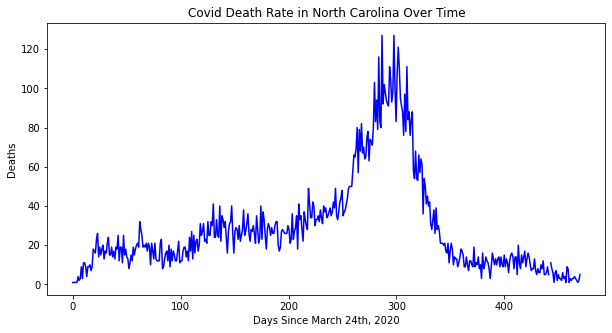

In [31]:
plt.xlabel('Days Since March 24th, 2020')
plt.ylabel('Deaths')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Death Rate in North Carolina Over Time')
x_vals = np.linspace(0, 470, 470)
plt.plot(x_vals, covid_data["Deaths by Date of Death"], 'b')

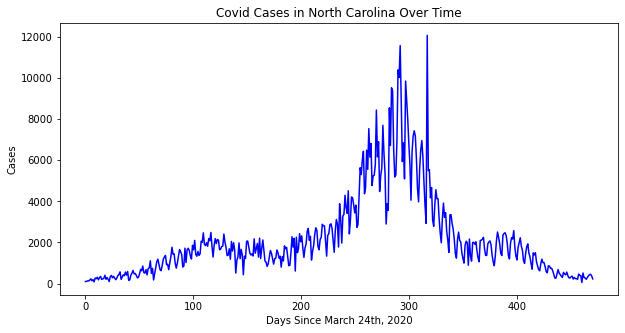

In [46]:
plt.xlabel('Days Since March 24th, 2020')
plt.ylabel('Cases')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Cases in North Carolina Over Time')
x_vals = np.linspace(0, 470, 470)
plt.plot(x_vals, covid_data["Cases by Report Date"], 'b')

In [105]:
covid_county_data = pd.read_csv(r"./NCCountyDeaths.csv", encoding = "utf-8")
covid_county_data.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [4]:
covid_america = pd.read_csv(r"./owid-covid-data.csv")
covid_america.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [96]:
covid_complete_data = pd.read_csv("./NCCovidTrain.csv")
covid_training_processed = covid_complete_data[['Deaths by Date of Death']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

covid_training_scaled = scaler.fit_transform(covid_training_processed)

len(covid_training_scaled)

450

In [97]:
covid_training_features = []
covid_training_labels = []
for i in range(60, len(covid_training_scaled)):
    covid_training_features.append(covid_training_scaled[i-60:i, 0])
    covid_training_labels.append(covid_training_scaled[i, 0])
    
X_train = np.array(covid_training_features)
y_train = np.array(covid_training_labels)
print(X_train.shape)
print(y_train.shape)

(390, 60)
(390,)


In [98]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [99]:
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model

In [100]:
input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation = 'relu', return_sequences = True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation = 'relu', return_sequences = True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation = 'relu', return_sequences = True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation = 'relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer = 'adam', loss = 'mse')

In [101]:
print(X_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(390, 60, 1)
(390,)
(390, 1)


In [102]:
model_history = model.fit(X_train, y_train, epochs = 10, verbose = 1, batch_size = 32)

Epoch 1/10
13/13 [==============================] - 10s 67ms/step - loss: nan
Epoch 2/10
13/13 [==============================] - 1s 67ms/step - loss: nan
Epoch 3/10
13/13 [==============================] - 1s 63ms/step - loss: nan
Epoch 4/10
13/13 [==============================] - 1s 90ms/step - loss: nan
Epoch 5/10
13/13 [==============================] - 1s 57ms/step - loss: nan
Epoch 6/10
13/13 [==============================] - 1s 64ms/step - loss: nan
Epoch 7/10
13/13 [==============================] - 1s 61ms/step - loss: nan
Epoch 8/10
13/13 [==============================] - 1s 66ms/step - loss: nan
Epoch 9/10
13/13 [==============================] - 1s 64ms/step - loss: nan
Epoch 10/10
13/13 [==============================] - 1s 60ms/step - loss: nan


In [93]:
covid_testing_complete_data = pd.read_csv("./NCCovidTest.csv")
covid_testing_processed = covid_testing_complete_data[['Deaths by Date of Death']].values

covid_all_data = pd.concat((covid_complete_data['Deaths by Date of Death'], covid_testing_complete_data['Deaths by Date of Death']), axis = 0)

test_inputs = covid_all_data[len(covid_all_data) - len(covid_testing_complete_data) - 60:].values
print(test_inputs.shape)

test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

covid_test_features = []
for i in range(60, 80):
    covid_test_features.append(test_inputs[i-60:i, 0])

X_test = np.array(covid_test_features)
print(X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
print(y_pred.shape)

(80,)
(80, 1)
(20, 60)
(20, 60, 1)
(20, 1)


In [95]:
covid_all_data.head()
print(y_pred)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


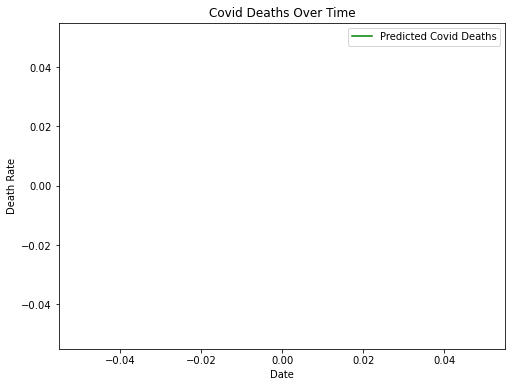

In [83]:
plt.figure(figsize=(8,6))
#plt.plot(covid_testing_processed, color='red', label = 'Actual Covid Deaths')
plt.plot(y_pred, color = 'green', label = 'Predicted Covid Deaths')
plt.title('Covid Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.show()